# Muhammad Rizki Mardanu Hilman

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_auc_score

In [ ]:
df = pd.read_csv('home_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#droping the unnecessary columns such as id, date
df.drop(['id','date'],axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Explore Data Analysis


## Descriptive Statistics

In [ ]:
# melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [ ]:
# melihat statistik deskriptif pada data
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
# melihat jumlah missing value
df.isna().sum()/len(df)*100

price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

In [ ]:
# melihat data duplikat
df.duplicated().sum()

5

In [ ]:
# Melihat unique values
df.nunique()

price            4032
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

## Data Preprocessing

In [ ]:
# changing float to integer
df['bathrooms'] = df['bathrooms'].astype(int)
df['floors'] = df['floors'].astype(int)
# renaming the column yr_built to age and changing the values to age
df.rename(columns={'yr_built':'age'},inplace=True)
df['age'] = 2023 - df['age']
# changing the column yr_renovated to renovated and changing the values to 0 and 1
df.rename(columns={'yr_renovated':'renovated'},inplace=True)
df['renovated'] = df['renovated'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
# using simple feature scaling
df['sqft_living'] = df['sqft_living']/df['sqft_living'].max()
df['sqft_living15'] = df['sqft_living15']/df['sqft_living15'].max()
df['sqft_lot'] = df['sqft_lot']/df['sqft_lot'].max()
df['sqft_above'] = df['sqft_above']/df['sqft_above'].max()
df['sqft_basement'] = df['sqft_basement']/df['sqft_basement'].max()
df['sqft_lot15'] = df['sqft_lot15']/df['sqft_lot15'].max()

In [ ]:
# pengelompokan kolom berdasarkan typedata (numerikal & kategorikal)
df.select_dtypes(exclude='object').columns
df.select_dtypes(include='object').columns
nums = df.select_dtypes(exclude='object').columns
cats = df.select_dtypes(include='object').columns

## Univariate Analysis

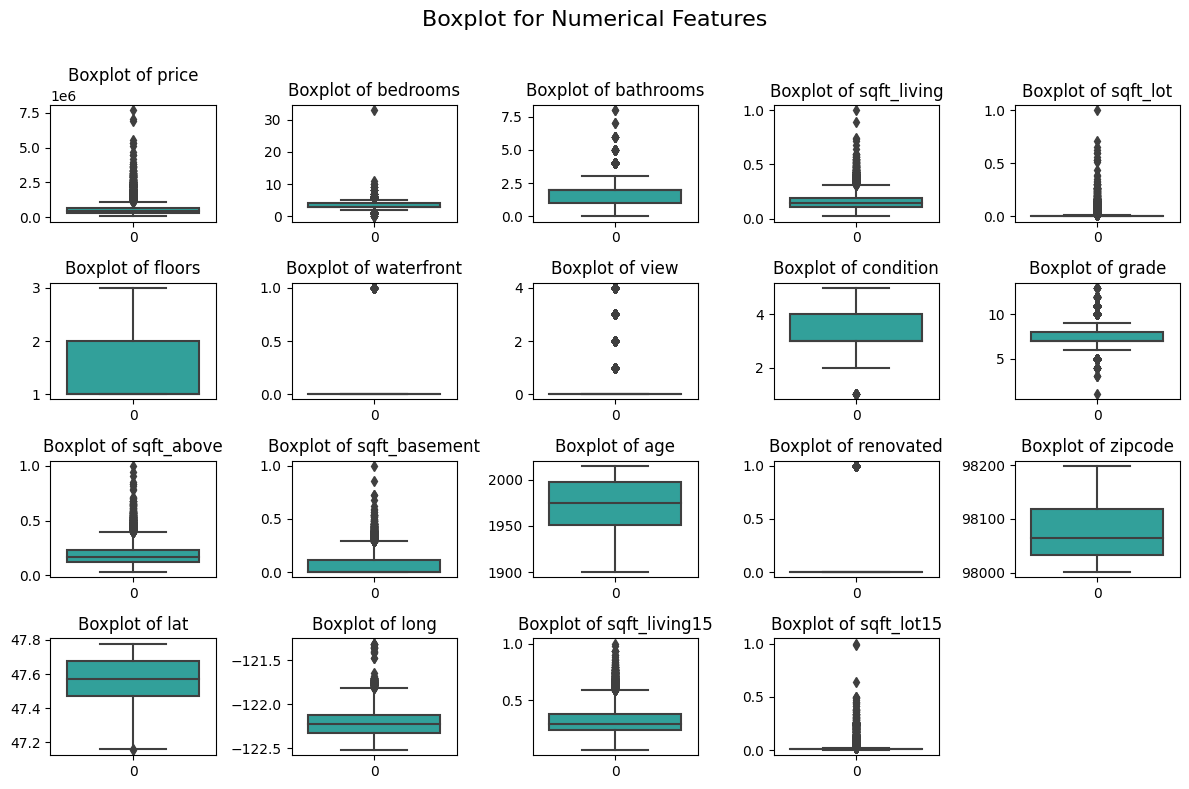

In [ ]:
# membuat boxplot untuk setiap kolom numerikal
plt.figure(figsize=(12, 8))
for i in range(0, len(nums)):
    plt.subplot(4,5, i+1)
    sns.boxplot(df[nums[i]], color='lightseagreen')
    plt.title('Boxplot of {}'.format(nums[i]))
    plt.suptitle('Boxplot for Numerical Features\n', fontsize=16, fontweight='medium')
    plt.tight_layout()
plt.show()

In [ ]:
# skewness value untuk kolom numerikal
for i in range(0, len(nums)):
    print(f"Skewness {df[nums].columns[i]} : {df[nums[i]].skew()}")

Skewness price : 4.02406912248237
Skewness bedrooms : 1.97429953543601
Skewness bathrooms : 0.90210538977192
Skewness sqft_living : 1.4715554268020914
Skewness sqft_lot : 13.06001895903175
Skewness floors : 0.7261783875781029
Skewness waterfront : 11.385107942339081
Skewness view : 3.395749593248714
Skewness condition : 1.0328046374434587
Skewness grade : 0.7711032007576067
Skewness sqft_above : 1.4466644733818377
Skewness sqft_basement : 1.577965055599625
Skewness age : -0.46980539881436767
Skewness renovated : 4.549025981558497
Skewness zipcode : 0.4056612082396646
Skewness lat : -0.4852704765380854
Skewness long : 0.8850529834328096
Skewness sqft_living15 : 1.108181275896696
Skewness sqft_lot15 : 9.506743246764398


### Multivariate Analysis

In [ ]:
# using correlation statistical method to find the relation between the price and other features
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.510072
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.237211
renovated        0.126092
sqft_lot         0.089661
sqft_lot15       0.082447
age              0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

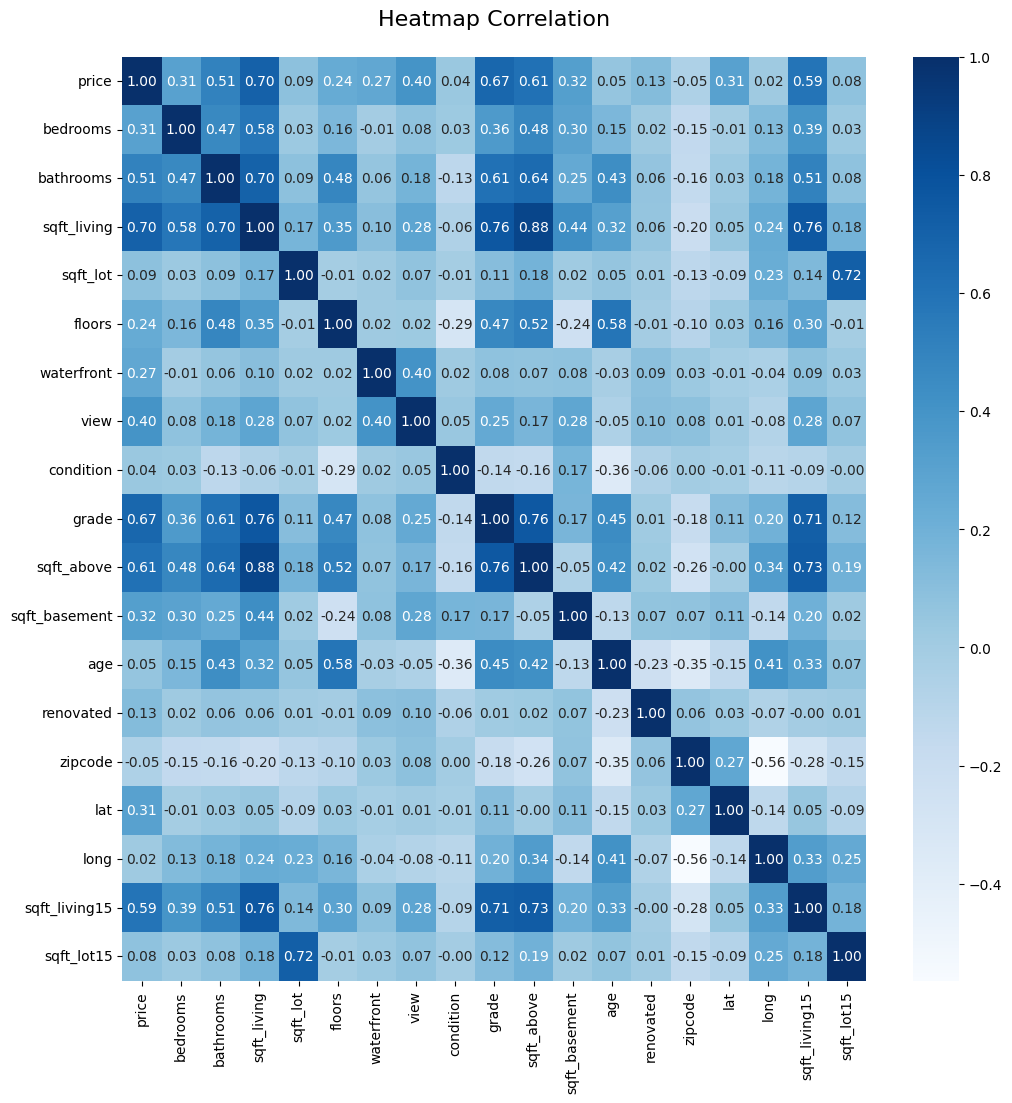

In [ ]:
# melihat korelasi antar kolom numerikal dengan heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.title('Heatmap Correlation\n', fontsize=16)
plt.show()

In [ ]:
sns.pairplot(df)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

#Splitting data into Training and Testing data

In [ ]:
# To show the columns or features of our dataset
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'age', 'renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
X = df_train.drop('price', axis=1)
y = df_train['price']

In [ ]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [ ]:
# Display the first few rows of the training subset
df_train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20477,355000,3,2.00,1220,1186,3.0,0,0,3,8,1220,0,2007,0,98103,47.6972,-122.341,1280,1251
4102,269950,4,1.00,1440,9600,1.0,0,0,2,7,1440,0,1964,0,98001,47.3168,-122.264,1740,43560
3415,400000,2,1.75,2110,9519,1.0,0,0,2,7,2110,0,1948,0,98155,47.7504,-122.306,1480,9519
12167,200000,2,1.00,860,6600,1.0,0,0,5,6,860,0,1949,0,98168,47.4878,-122.324,1030,6732
8823,425000,2,2.00,1280,4095,2.0,0,0,4,8,1280,0,1918,0,98136,47.5501,-122.393,1470,5500


In [ ]:
# Checking the shape of training set
df_train.shape

(15129, 19)

In [ ]:
# Display the first few rows of the testing subset
df_test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19836,285000,3,2.5,2437,5136,2.0,0,0,3,7,2437,0,2011,0,98002,47.3517,-122.210,2437,4614
10442,239950,3,2.5,1560,4800,2.0,0,0,4,7,1560,0,1974,0,98001,47.2653,-122.285,1510,12240
20548,460000,3,2.5,2390,47480,2.0,0,0,3,9,2390,0,2007,0,98058,47.4517,-122.084,1720,44866
11014,397500,3,1.0,1480,5100,1.5,0,0,3,7,1480,0,1938,1959,98103,47.6915,-122.348,1300,5100
4138,545000,4,3.5,1880,1341,3.0,0,0,3,8,1650,230,2007,0,98122,47.6053,-122.306,1740,1883


In [ ]:
# Checking the shape of training set
df_test.shape

(6484, 19)

## Model Training

In [ ]:
## DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(random_state=0)
ada.fit(X_train, y_train)

AdaBoostRegressor(random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.linear_model import LogisticRegression
Logreg = LogisticRegression()
Logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Algoritma Machine Learning

dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
ada = AdaBoostRegressor(random_state=0)
regressor = LinearRegression()
Logreg = LogisticRegression()

models = [dt, rf, ada, regressor, Logreg]

In [ ]:
results = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'R2 Score', 'RMSE'])


In [ ]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = math.sqrt(mse)
    results = results.append({'Model': str(model), 'MAE': mae, 'MSE': mse, 'R2 Score': r2, 'RMSE': rmse}, ignore_index=True)

<ipython-input-158-5dac2fe41e4b>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': str(model), 'MAE': mae, 'MSE': mse, 'R2 Score': r2, 'RMSE': rmse}, ignore_index=True)
<ipython-input-158-5dac2fe41e4b>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': str(model), 'MAE': mae, 'MSE': mse, 'R2 Score': r2, 'RMSE': rmse}, ignore_index=True)
<ipython-input-158-5dac2fe41e4b>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': str(model), 'MAE': mae, 'MSE': mse, 'R2 Score': r2, 'RMSE': rmse}, ignore_index=True)
<ipython-input-158-5dac2fe41e4b>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in 

In [ ]:
# Menampilkan hasil dalam bentuk tabel
print(results)

                                   Model            MAE           MSE  \
0  DecisionTreeRegressor(random_state=0)  103314.570390  4.027956e+10   
1  RandomForestRegressor(random_state=0)   70235.871391  1.797127e+10   
2      AdaBoostRegressor(random_state=0)  271979.269675  9.459112e+10   
3                     LinearRegression()  123471.430828  3.926783e+10   
4                   LogisticRegression()  196302.593192  1.082042e+11   

   R2 Score           RMSE  
0  0.707646  200697.684738  
1  0.869562  134056.964454  
2  0.313446  307556.700893  
3  0.714989  198161.129753  
4  0.214641  328944.029466  


Dengan mempertimbangkan hasil evaluasi dari beberapa model dan juga dikaitkan dengan tujuan dari model ini adalah menekan atau meminimalkan kesalahan besar serta mengukur kinerja model yang digunakan untuk menentukan harga produk oleh karena itu terpilih random forest yang menjadi model terbaik dengan skor MAE dan MSE terkecil diantara yang lain nya.

# Feature Importances

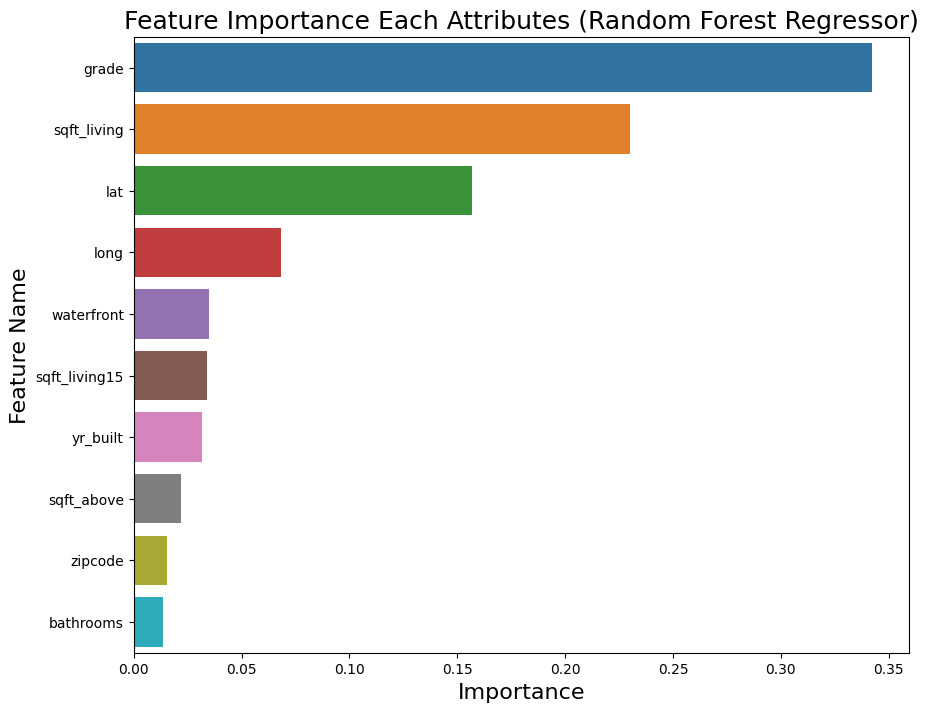

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rf.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

## Predicting the price of a new house

In [ ]:
#input the values
bedrooms = 3
bathrooms = 2
sqft_living = 2000
sqft_lot = 10000
floors = 2
waterfront = 0
view = 0
condition = 3
grade = 8
sqft_above = 2000
sqft_basement = 0
yr_built = 1990
yr_renovated = 0
zipcode = 98001
lat = 47.5480
long = -121.9836
sqft_living15 = 2000
sqft_lot15 = 10000


In [ ]:
#predicting the price using random forest regression
price = regressor.predict([[bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15]])
print('The price of the house is $',price[0])

The price of the house is $ 487383.6840179246


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
